In [362]:
import pandas as pd
import numpy as np
import itertools

In [363]:
returns = pd.read_csv("../data/returns/data_returns.csv", index_col="Date")

In [364]:
initial_amout = 1_000

In [365]:
returns = pd.read_csv("../data/returns/data_returns.csv", index_col="Date")

In [366]:
n_asset = len(returns.columns) # -1 for the date
step = 0.1  

values = np.arange(0, 1 + step, step)

distributions = [
    list(w)
    for w in itertools.product(values, repeat=n_asset)
    if abs(sum(w) - 1.0) < 1e-8
]

print(distributions)

[[np.float64(0.0), np.float64(0.0), np.float64(1.0)], [np.float64(0.0), np.float64(0.1), np.float64(0.9)], [np.float64(0.0), np.float64(0.2), np.float64(0.8)], [np.float64(0.0), np.float64(0.30000000000000004), np.float64(0.7000000000000001)], [np.float64(0.0), np.float64(0.4), np.float64(0.6000000000000001)], [np.float64(0.0), np.float64(0.5), np.float64(0.5)], [np.float64(0.0), np.float64(0.6000000000000001), np.float64(0.4)], [np.float64(0.0), np.float64(0.7000000000000001), np.float64(0.30000000000000004)], [np.float64(0.0), np.float64(0.8), np.float64(0.2)], [np.float64(0.0), np.float64(0.9), np.float64(0.1)], [np.float64(0.0), np.float64(1.0), np.float64(0.0)], [np.float64(0.1), np.float64(0.0), np.float64(0.9)], [np.float64(0.1), np.float64(0.1), np.float64(0.8)], [np.float64(0.1), np.float64(0.2), np.float64(0.7000000000000001)], [np.float64(0.1), np.float64(0.30000000000000004), np.float64(0.6000000000000001)], [np.float64(0.1), np.float64(0.4), np.float64(0.5)], [np.float64(0

Best return portfolio allocation:
URTH : 30.00%
GLD : 70.00%
USO : 0.00%


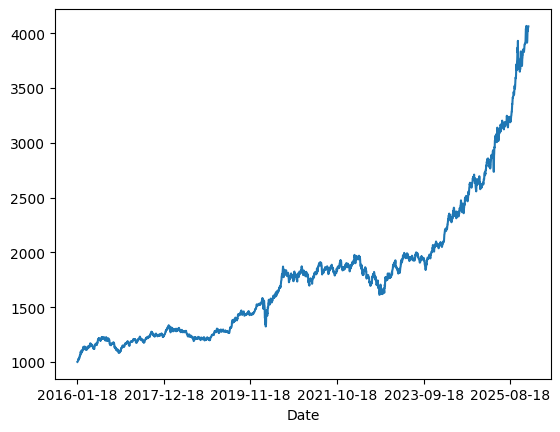

In [367]:
asset_names = returns.columns.tolist()

best_return_portfolio = {
    "evolution": None,
    "final_value": -np.inf,
    "weights": None
}

for action in distributions:
    portfolio_returns = (returns.copy() * action).sum(axis=1)

    final_value_return = initial_amout * (1 + portfolio_returns).prod()

    if final_value_return > best_return_portfolio["final_value"]:
        evolution_return = initial_amout * (1 + portfolio_returns).cumprod()

        best_return_portfolio["evolution"] = evolution_return
        best_return_portfolio["final_value"] = final_value_return
        best_return_portfolio["weights"] = action

best_return_portfolio["evolution"].plot()

asset_return_names = returns.columns.tolist()
print("Best return portfolio allocation:")
for asset, weight in zip(asset_return_names, best_return_portfolio["weights"]):
    print(f"{asset} : {weight:.2%}")

Best Sharpe portfolio allocation:
URTH : 40.00%
GLD : 60.00%
USO : 0.00%


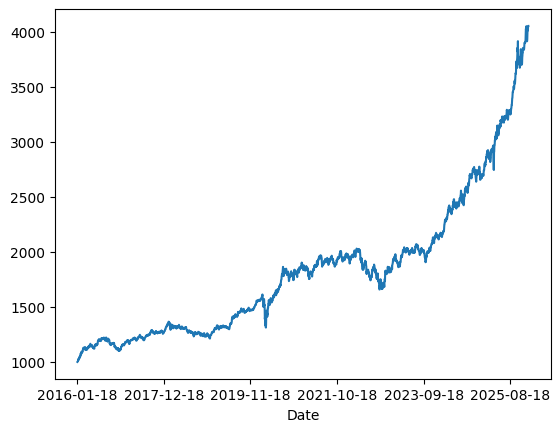

In [ ]:
best_sharpe = -np.inf
best_sharpe_portfolio = {
    "evolution": None,
    "final_value": -np.inf,
    "sharpe": -np.inf,
    "weights": None
}

for action in distributions:
    portfolio_returns = (returns.copy() * action).sum(axis=1)

    mean_return = portfolio_returns.mean()
    volatility = portfolio_returns.std()

    if volatility == 0:
        continue

    sharpe = mean_return / volatility

    if sharpe > best_sharpe_portfolio["sharpe"]:
        best_sharpe = sharpe
        final_value = initial_amout * (1 + portfolio_returns).prod()
        evolution = initial_amout * (1 + portfolio_returns).cumprod()

        best_sharpe_portfolio["evolution"] = evolution
        best_sharpe_portfolio["final_value"] = final_value
        best_sharpe_portfolio["sharpe"] = best_sharpe
        best_sharpe_portfolio["weights"] = action

best_sharpe_portfolio["evolution"].plot()

asset_sharpe_names = returns.columns.tolist()
print("Best Sharpe portfolio allocation:")
for asset, weight in zip(asset_sharpe_names, best_sharpe_portfolio["weights"]):
    print(f"{asset} : {weight:.2%}")

print(f"Best Sharpe Ratio: {best_sharpe_portfolio['sharpe']}")